In [1]:
import os
import matplotlib.pyplot as plt
import tqdm 
import numpy as np

In [2]:
terms = open("medizinische_begriffe_wiki.txt","r")
term_set = set()

for term in terms.read().split(","):
    if term.count(" ") < 3 and len(term) < 20:
        term_set.add(term)
len(term_set)

10265

In [3]:
thresh = 1100 # ca 10kb text

In [4]:
word_counter = {}
excluded = 0
sentence_lengths = []
for filename in tqdm.tqdm(os.listdir("data")):
    with open("data/" + filename, encoding="utf-8") as file:
        text = file.read().replace("\n","")
        split = text.split()
        intersect = term_set.intersection(split)
        sentence_lengths += list(map(len,map(str.split, text.split("."))))
        for word in intersect:
            if word in word_counter:
                word_counter[word] += 1
            else:
                word_counter[word] = 1
        if len(split) < thresh:
            excluded += 1

100%|██████████| 99607/99607 [00:15<00:00, 6271.16it/s]


In [5]:
print(f"Excluded {excluded} files that did not contain more than 1100 words")

Excluded 81203 files that did not contain more than 1100 words


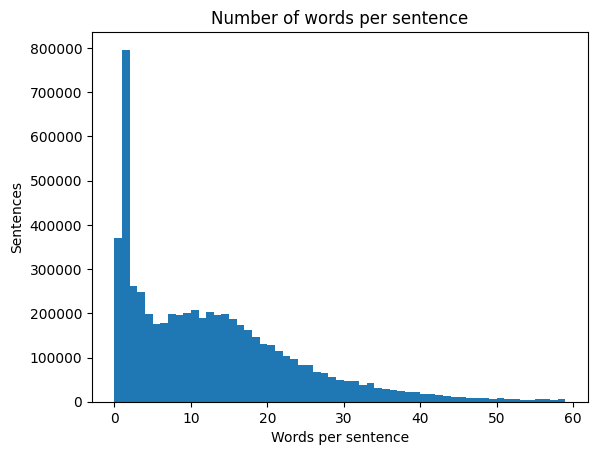

In [6]:
fig, ax = plt.subplots()

# Plot the histogram using ax
ax.hist(sentence_lengths, bins=range(min(sentence_lengths), 60, 1))

# Set labels for the axes
ax.set_xlabel("Words per sentence")
ax.set_ylabel("Sentences")
ax.set_title("Number of words per sentence")

# Display the plot
plt.show()

In [7]:
sorted_list = sorted(word_counter.items(), key=lambda item: item[1])

for key, value in sorted_list[-100:]:
    print(key, value)

Medikament 2384
Schwindel 2387
schnelle 2405
Gesundheitswesen 2433
Tod 2434
Schlaganfall 2454
Facharzt 2460
Auge 2557
therapeutische 2565
AIDS 2585
Mediziner 2593
Augenheilkunde 2597
Packung 2607
Schmerztherapie 2611
Rehabilitation 2617
Radiologie 2622
Knochen 2642
Magen 2690
soziale 2694
Fokus 2695
Wachstum 2712
Kardiologie 2743
Unfallchirurgie 2746
schwerer 2778
Erbrechen 2781
Temperatur 2803
Hygiene 2824
Einleitung 2826
Mund 2844
Kopf 2853
Symptom 2858
Frauenheilkunde 2881
Lunge 2914
Allgemeinmedizin 2915
Leber 2941
Haarausfall 2991
Licht 3011
Urologie 3142
Schwellung 3148
Kommunikation 3154
Blutdruck 3165
HIV 3225
Raum 3269
Geburt 3286
Onkologie 3298
Apotheke 3519
chronische 3559
Alkohol 3583
Immunsystem 3623
Durchfall 3681
Bakterien 3701
Husten 3717
Depression 3761
Geburtshilfe 3795
Herz 3816
Belastung 3842
Psychiatrie 3916
Reaktion 3975
Operation 4002
Darm 4066
Vitamin 4076
Intensivmedizin 4092
Neurologie 4112
Wirksamkeit 4130
Verhalten 4130
Hand 4319
Verlauf 4339
Wirkstoff 4483


In [8]:
terms2 = open("medizinische_begriffe_wiki.txt","r")
term_set2 = set(terms2.read().split(","))
terms3 = open("medizinische_begriffe_wiki_removed_frequent.txt","r")
term_set3 = set(terms3.read().split(","))

In [9]:
x = term_set2.difference(term_set3)
print("Removed terms:",set(np.array(sorted_list[-100:])[:,0]).difference(set([e[0] for e in sorted_list[-100:] if e[0] not in x])))

Removed terms: {'Verlauf', 'Temperatur', 'Wirkung', 'Hand', 'Alkohol', 'Sprache', 'Verfahren', 'Schutz', 'Kommunikation', 'schnelle', 'Mittel', 'Mund', 'Fokus', '2', 'schwerer', 'Raum', 'hoher', 'Rolle', 'Packung', 'Fall', 'Alter', 'Bewegung', 'Einleitung', 'Licht', 'Kopf', 'soziale', 'Wasser'}


In [10]:
terms = open("common_chatgpt_medical_terms.txt","r")
term_set = set(terms.read().split(","))

In [11]:
chunk = open("training_data/chunk_short.txt","a", encoding="utf-8")
sentences_per_row = 40
removed_sentences = []

remaining_sentences_ratio = 0

excluded = 0
for filename in tqdm.tqdm(os.listdir("data")):
    with open("data/" + filename, encoding="utf-8") as file:
        text = file.read().replace("\n","")
        split = text.split()
        intersect = term_set.intersection(split)
        if len(split) > thresh and intersect:
            sentences = np.array(text.split("."))
            sentence_lengths = np.array(list(map(len,map(str.split, sentences))))
            remaining_sentences = sentences[(sentence_lengths > 4) & (sentence_lengths < 30)]
            remaining_sentences_ratio += len(remaining_sentences) / len(sentences)
            sentences = remaining_sentences
            
            sentences = sentences[:int(len(sentences)/sentences_per_row)*sentences_per_row].reshape(int(len(sentences)/sentences_per_row),sentences_per_row)
            chunk.write("\n".join(map(str.lstrip, map(".".join, sentences))))
        else:
            excluded += 1
remaining_sentences_ratio /= len(os.listdir("data")) - excluded
chunk.close()

100%|██████████| 99607/99607 [00:23<00:00, 4216.67it/s]


In [12]:
print(f"Excluded {excluded} out of {len(os.listdir('data'))} files that did not contain more than 1100 words and any medical terms from the term set")

Excluded 90043 out of 99607 files that did not contain more than 1100 words and any medical terms from the term set


In [13]:
print(f"The ratio of sentences removed from the remaining documents is {remaining_sentences_ratio}")

The ratio of sentences removed from the remaining documents is 0.6408140288015415
